In [34]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


In [35]:
# 1. Membaca dataset
df = pd.read_csv('train_preprocess.tsv', sep='\t', header=None, names=['text', 'label'])
print(df.head())

                                                text     label
0  warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1  mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2  lokasi strategis di jalan sumatera bandung . t...  positive
3  betapa bahagia nya diri ini saat unboxing pake...  positive
4  duh . jadi mahasiswa jangan sombong dong . kas...  negative


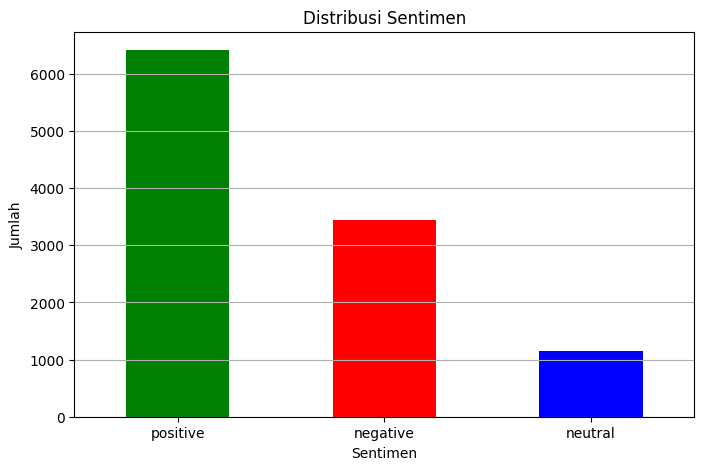

In [36]:
#2. Distribusi sentimen
sentiment_counts = df['label'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [37]:
# 3. Memisahkan Fitur dan Label
X = df['text']  # Fitur teks 
y = df['label']  # Label sentimen


In [38]:
# 4. Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# 5. Membuat pipeline yang menggabungkan TfidfVectorizer dan LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Langkah pertama adalah vektorisasi
    ('model', LogisticRegression())  # Langkah kedua adalah pelatihan model
])


In [40]:
# 6. Melatih Pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('model', LogisticRegression())])

In [41]:
# 7. Melakukan prediksi pada data uji
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.82      0.81       680
     neutral       0.86      0.68      0.76       239
    positive       0.89      0.91      0.90      1281

    accuracy                           0.86      2200
   macro avg       0.85      0.80      0.82      2200
weighted avg       0.86      0.86      0.86      2200



In [42]:
joblib.dump(pipeline, 'sentiment_pipeline.joblib')

['sentiment_pipeline.joblib']